<a href="https://colab.research.google.com/github/seque1204/SafetyMeasuresAnalysis/blob/main/Safety_Measurements_in_CR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
file_name = '/content/drive/MyDrive/Colab Notebooks/CS395/Safety Causal Inference Proj/data.csv'
target_display_name = 'SafetyIndex'
target = 'safety and security'
selected_country = 'Costa Rica'
event_date = 2022
group = ['El Salvador', 'Guatemala', 'Honduras', 'Nicaragua', 'Panama']
group_name = 'central america'

In [4]:
df = pd.read_csv(file_name)

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head()

,country_code,country,year,safety and security,perceived criminality in society,displaced people,political instability,political terror,terrorist activity,homicides,violent crime,violent demonstrations,jailed population,security officers and police,overall,ranking (out of 163),access to weapons,organised conflict (internal),weapons imports,deaths from conflict (internal),military expenditure,armed services personnel,un peacekeeping funding,nuclear and heavy weapons,weapons exports,neighbouring country relations,deaths from conflict (external),external conflicts fought,internal conflicts fought,domestic and international conflict,militarisation
0,1,Costa Rica,2024,2.590,3.55,1.001,1.125,1.0,1.0,4.282,3.5,2.25,3.717,2.374,1.95,58.0,4.0,1.0,1.021,1.000,1.277,1.000,2.334,1.002,1.000,2.0,1.0,1.000,1.000,1.252,1.722
1,2,Panama,2024,2.942,2.95,1.001,2.975,1.0,1.0,4.132,4.0,2.25,4.952,4.256,2.14,96.0,3.0,2.0,1.000,1.000,1.526,1.000,2.432,1.004,1.006,2.0,1.0,1.000,1.000,1.504,1.585
2,3,Nicaragua,2024,2.818,2.85,1.087,3.500,3.5,1.0,4.101,3.0,1.00,3.630,1.832,2.30,113.0,4.0,4.0,1.026,1.000,1.263,1.259,1.545,1.006,1.000,3.0,1.0,1.000,1.000,2.260,1.659
3,4,Honduras,2024,3.195,2.85,1.995,2.750,3.0,1.0,5.000,5.0,2.25,2.516,1.866,2.42,123.0,4.0,3.0,1.035,2.078,1.598,1.214,1.547,1.009,1.000,2.0,1.0,1.000,1.158,2.048,1.695
4,5,El Salvador,2024,2.792,1.55,1.694,2.500,4.0,1.0,3.457,2.5,1.50,5.000,3.174,2.25,107.0,4.0,2.0,1.048,1.000,1.339,1.585,4.952,1.018,1.000,2.0,1.0,1.575,1.053,1.577,2.112


I'm sure the data is clean because I wrote it ;)

In [6]:
from sklearn.preprocessing import MinMaxScaler
df_scaled = df.copy()
scaler = MinMaxScaler()
columns_not_to_scale = ['country_code', 'country', 'year']
columns_to_scale = [col for col in df.columns if col not in columns_not_to_scale]
df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])


# Graph safety index of each country by year


In [7]:
df_grouped = df_scaled.groupby(['country', 'year'])[target].mean().reset_index()
df_grouped.head(10)

,country,year,safety and security
0,Costa Rica,2008,0.000000
1,Costa Rica,2009,0.024938
2,Costa Rica,2010,0.199501
3,Costa Rica,2011,0.177057
4,Costa Rica,2012,0.119701
5,Costa Rica,2013,0.153782
6,Costa Rica,2014,0.125520
7,Costa Rica,2015,0.164589
8,Costa Rica,2016,0.201164
9,Costa Rica,2017,0.160432


In [8]:
# Pivot the DataFrame so that each country's Safety Index is a separate column
df_pivot = df_grouped.pivot(index='year', columns='country', values=target)
df_pivot.head()

country,Costa Rica,El Salvador,Guatemala,Honduras,Nicaragua,Panama
year,,,,,,
2008,0.000000,0.781380,0.839568,0.739817,0.266002,0.049875
2009,0.024938,0.814630,0.773067,0.748130,0.174564,0.191189
2010,0.199501,0.798005,0.698254,0.714879,0.297589,0.507066
2011,0.177057,0.820449,0.741480,0.810474,0.357440,0.434746
2012,0.119701,0.851205,0.731505,0.748961,0.364090,0.480466


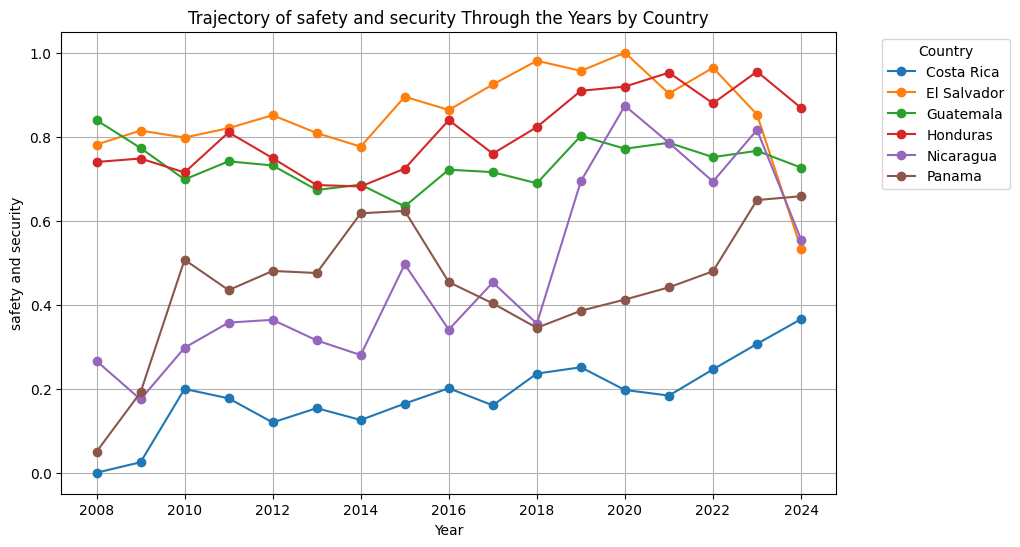

In [9]:
# Plotting the trajectories
plt.figure(figsize=(10, 6))

for country in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[country], marker='o', label=country)

plt.title(f'Trajectory of {target} Through the Years by Country')
plt.xlabel('Year')
plt.ylabel(target)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

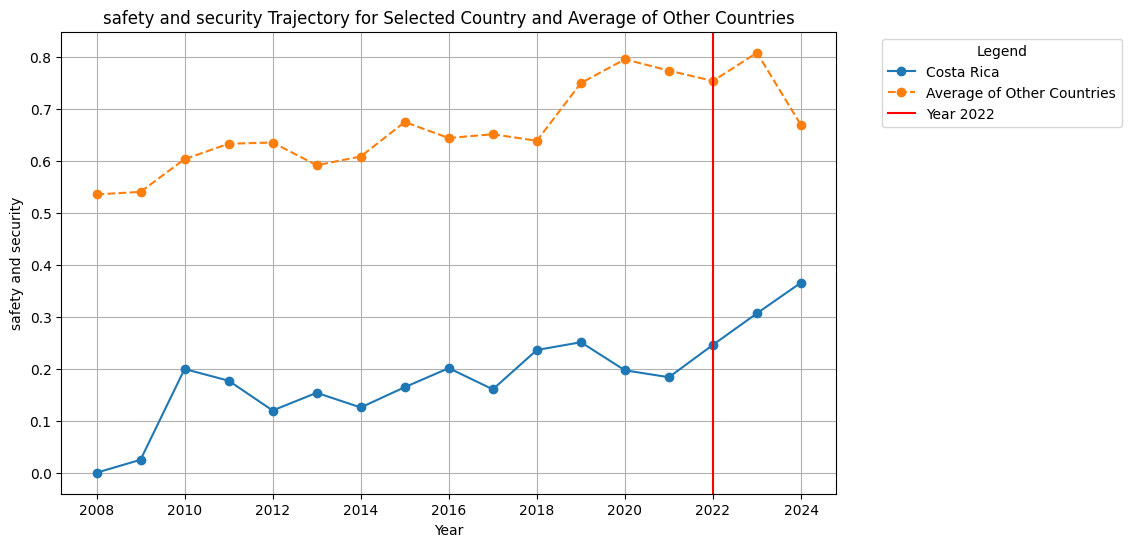

In [10]:
df_selected = df_scaled[df_scaled['country'] == selected_country]

# Calculate the average Safety Index for all other countries
df_other_countries = df_scaled[df_scaled['country'] != selected_country]
df_other_avg = df_other_countries.groupby('year')[target].mean().reset_index()

# Plotting the selected country's Safety Index and the average of the other countries
plt.figure(figsize=(10, 6))

# Plot selected country's data
plt.plot(df_selected['year'], df_selected[target], marker='o', label=f'{selected_country}')

# Plot average Safety Index of other countries
plt.plot(df_other_avg['year'], df_other_avg[target], marker='o', label='Average of Other Countries', linestyle='--')

# Add vertical line on 2022
plt.axvline(x=2022, color='r', linestyle='-', label=f'Year {event_date}')

plt.title(f'{target} Trajectory for Selected Country and Average of Other Countries')
plt.xlabel('Year')
plt.ylabel(target)
plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

since 2022, costa rica's safety has been going up which signals insecurity and the average of the other countries has lowered which signals an opposite trend so this is exactly what we want to see and allows us to continue the experiment.

In [11]:
#Get the data for before the event (2022)
df_before = df_scaled[df_scaled['year'] < event_date]
df_after = df_scaled[df_scaled['year'] >= event_date]
df_before.head()

,country_code,country,year,safety and security,perceived criminality in society,displaced people,political instability,political terror,terrorist activity,homicides,violent crime,violent demonstrations,jailed population,security officers and police,overall,ranking (out of 163),access to weapons,organised conflict (internal),weapons imports,deaths from conflict (internal),military expenditure,armed services personnel,un peacekeeping funding,nuclear and heavy weapons,weapons exports,neighbouring country relations,deaths from conflict (external),external conflicts fought,internal conflicts fought,domestic and international conflict,militarisation
18,1,Costa Rica,2021,0.183707,0.661017,0.001005,0.000000,0.000000,0.0,0.519892,0.000000,0.230769,0.751989,0.272424,0.059701,0.011494,1.0,0.000000,0.085938,0.000000,0.346008,0.000000,0.215840,0.058824,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.327189
19,2,Panama,2021,0.441397,0.644068,0.001005,0.375000,0.000000,0.0,0.534409,0.333333,0.230769,0.799432,0.605263,0.313433,0.356322,0.0,0.333333,0.000000,0.000000,0.882129,0.000000,0.236589,0.176471,1.0,0.0,0.0,0.000000,0.000000,0.250000,0.119816
20,3,Nicaragua,2021,0.785536,0.644068,0.043216,1.000000,1.000000,0.0,0.156989,1.000000,0.230769,0.610795,0.071534,0.910448,0.931034,1.0,1.000000,0.847656,0.000000,0.117871,0.451505,0.072115,0.294118,0.0,1.0,0.0,0.000000,0.000000,1.000000,0.287250
21,4,Honduras,2021,0.952618,0.491525,0.922613,0.625000,0.833333,0.0,1.000000,1.000000,0.461538,0.355114,0.057079,1.000000,0.988506,1.0,0.666667,0.179688,0.037106,1.000000,0.374582,0.636387,0.470588,0.0,0.0,0.0,0.000000,0.335443,0.516865,0.735791
22,5,El Salvador,2021,0.902743,0.406780,0.617085,0.166667,0.500000,0.0,1.000000,1.000000,0.307692,1.000000,0.535211,0.820896,0.896552,1.0,0.333333,0.070312,0.000000,0.309886,0.989967,0.320344,0.882353,0.0,0.0,0.0,0.580645,0.000000,0.301587,0.508449


In [12]:
df_before[df_before['country'] == selected_country]

,country_code,country,year,safety and security,perceived criminality in society,displaced people,political instability,political terror,terrorist activity,homicides,violent crime,violent demonstrations,jailed population,security officers and police,overall,ranking (out of 163),access to weapons,organised conflict (internal),weapons imports,deaths from conflict (internal),military expenditure,armed services personnel,un peacekeeping funding,nuclear and heavy weapons,weapons exports,neighbouring country relations,deaths from conflict (external),external conflicts fought,internal conflicts fought,domestic and international conflict,militarisation
18,1,Costa Rica,2021,0.183707,0.661017,0.001005,0.0,0.000000,0.0,0.519892,0.000000,0.230769,0.751989,0.272424,0.059701,0.011494,1.0,0.0,0.085938,0.0,0.346008,0.0,0.215840,0.058824,0.0,0.0,0.0,0.0,0.0,0.0,0.327189
24,1,Costa Rica,2020,0.197007,0.677966,0.001005,0.0,0.000000,0.0,0.548925,0.000000,0.230769,0.751989,0.272424,0.029851,0.011494,1.0,0.0,0.085938,0.0,0.300380,0.0,0.052885,0.058824,0.0,0.0,0.0,0.0,0.0,0.0,0.205837
30,1,Costa Rica,2019,0.251039,0.745763,0.001005,0.0,0.000000,0.0,0.573656,0.000000,0.384615,0.751989,0.272424,0.104478,0.137931,1.0,0.0,0.000000,0.0,0.336502,0.0,0.192055,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.304147
36,1,Costa Rica,2018,0.236076,0.677966,0.001005,0.0,0.333333,0.0,0.553226,0.000000,0.000000,0.751989,0.272424,0.119403,0.091954,1.0,0.0,0.000000,0.0,0.264259,0.0,0.307439,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.379416
42,1,Costa Rica,2017,0.160432,0.677966,0.001005,0.0,0.000000,0.0,0.536559,0.000000,0.153846,0.684659,0.272424,0.059701,0.022989,1.0,0.0,0.000000,0.0,0.309886,0.0,0.287449,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.370200
48,1,Costa Rica,2016,0.201164,0.677966,0.003015,0.0,0.333333,0.0,0.441935,0.000000,0.076923,0.684659,0.274277,0.029851,0.011494,1.0,0.0,0.000000,0.0,0.401141,0.0,0.008856,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.179724
54,1,Costa Rica,2015,0.164589,0.762712,0.003015,0.0,0.333333,0.0,0.270968,0.000000,0.076923,0.695739,0.274277,0.000000,0.000000,1.0,0.0,0.000000,0.0,0.418251,0.0,0.014676,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.185868
60,1,Costa Rica,2014,0.125520,0.644068,0.003015,0.0,0.333333,0.0,0.274194,0.000000,0.000000,0.696023,0.270941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,1,Costa Rica,2013,0.153782,0.593220,0.002010,0.0,0.333333,0.0,0.467742,0.000000,0.000000,0.596591,0.256116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,1,Costa Rica,2012,0.119701,0.779661,0.002010,0.0,0.000000,0.0,0.537634,0.000000,0.000000,0.596591,0.230170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
mean_target_selected_before = df_before[df_before['country'] == selected_country][target].mean()
mean_target_selected_after = df_after[df_after['country'] == selected_country][target].mean()

mean_safety_other_before = df_before[df_before['country'] != selected_country][target].mean()
mean_safety_other_after = df_after[df_after['country'] != selected_country][target].mean()

print(f"Mean {target} Index for {selected_country} (Before Event): {mean_target_selected_before:.2f}")
print(f"Mean {target} Index for {selected_country} (After Event): {mean_target_selected_after:.2f}")
print(f"Mean {target} Index for Other Countries (Before Event): {mean_safety_other_before:.2f}")
print(f"Mean {target} Index for Other Countries (After Event): {mean_safety_other_after:.2f}")

Mean safety and security Index for Costa Rica (Before Event): 0.16
Mean safety and security Index for Costa Rica (After Event): 0.31
Mean safety and security Index for Other Countries (Before Event): 0.65
Mean safety and security Index for Other Countries (After Event): 0.74


In [14]:
selected_diff = mean_target_selected_after - mean_target_selected_before
Other_diff = mean_safety_other_after - mean_safety_other_before
did = selected_diff - Other_diff

print(f'DID in {target} is {did:.2f}')

DID in safety and security is 0.05


In [15]:
df_pivot = df_grouped.pivot(index='year', columns='country', values=target)
df_pivot.head(10)

country,Costa Rica,El Salvador,Guatemala,Honduras,Nicaragua,Panama
year,,,,,,
2008,0.000000,0.781380,0.839568,0.739817,0.266002,0.049875
2009,0.024938,0.814630,0.773067,0.748130,0.174564,0.191189
2010,0.199501,0.798005,0.698254,0.714879,0.297589,0.507066
2011,0.177057,0.820449,0.741480,0.810474,0.357440,0.434746
2012,0.119701,0.851205,0.731505,0.748961,0.364090,0.480466
2013,0.153782,0.808811,0.673317,0.684954,0.315046,0.475478
2014,0.125520,0.776392,0.685786,0.681629,0.280133,0.617623
2015,0.164589,0.895262,0.634248,0.724023,0.496259,0.623441
2016,0.201164,0.863674,0.721530,0.839568,0.340815,0.453865


In [16]:
df_pivot[group_name] = df_pivot[group].mean(axis = 1)
df_pivot.drop(columns = group, inplace = True)
df_pivot

country,Costa Rica,central america
year,,
2008,0.000000,0.535328
2009,0.024938,0.540316
2010,0.199501,0.603159
2011,0.177057,0.632918
2012,0.119701,0.635245
2013,0.153782,0.591521
2014,0.125520,0.608313
2015,0.164589,0.674647
2016,0.201164,0.643890


In [17]:
df_pivot['event'] = 0

In [18]:
df_pivot['event'] = df_pivot.event.where(df_pivot.index < event_date, 1)

In [19]:
df_pivot

country,Costa Rica,central america,event
year,,,
2008,0.000000,0.535328,0
2009,0.024938,0.540316,0
2010,0.199501,0.603159,0
2011,0.177057,0.632918,0
2012,0.119701,0.635245,0
2013,0.153782,0.591521,0
2014,0.125520,0.608313,0
2015,0.164589,0.674647,0
2016,0.201164,0.643890,0


In [20]:
result = df_pivot.groupby('event').mean()
result

country,Costa Rica,central america
event,,
0,0.156751,0.648118
1,0.306179,0.743364


In [21]:
result[selected_country] - result[group_name]

,0
event,
0,-0.491367
1,-0.437185


In [22]:
(result[selected_country] - result[group_name]).diff()

,0
event,
0,NaN
1,0.054182


Same value as before indicating this new method works. A difference of 0.08 means that the score for safety is higher since the new presidency. (A higher score signifies a higher safety risk)

# DID regression model

In [23]:
df_grouped

,country,year,safety and security
0,Costa Rica,2008,0.000000
1,Costa Rica,2009,0.024938
2,Costa Rica,2010,0.199501
3,Costa Rica,2011,0.177057
4,Costa Rica,2012,0.119701
5,Costa Rica,2013,0.153782
6,Costa Rica,2014,0.125520
7,Costa Rica,2015,0.164589
8,Costa Rica,2016,0.201164
9,Costa Rica,2017,0.160432


In [24]:
df_grouped['event'] = 0
df_grouped['event'] = df_grouped.event.where(df_grouped.year < event_date, 1)
df_grouped

,country,year,safety and security,event
0,Costa Rica,2008,0.000000,0
1,Costa Rica,2009,0.024938,0
2,Costa Rica,2010,0.199501,0
3,Costa Rica,2011,0.177057,0
4,Costa Rica,2012,0.119701,0
5,Costa Rica,2013,0.153782,0
6,Costa Rica,2014,0.125520,0
7,Costa Rica,2015,0.164589,0
8,Costa Rica,2016,0.201164,0
9,Costa Rica,2017,0.160432,0


In [25]:
df_grouped['ExperimentalGroup'] = np.where(df_grouped.country == selected_country,1,0)
df_grouped

,country,year,safety and security,event,ExperimentalGroup
0,Costa Rica,2008,0.000000,0,1
1,Costa Rica,2009,0.024938,0,1
2,Costa Rica,2010,0.199501,0,1
3,Costa Rica,2011,0.177057,0,1
4,Costa Rica,2012,0.119701,0,1
5,Costa Rica,2013,0.153782,0,1
6,Costa Rica,2014,0.125520,0,1
7,Costa Rica,2015,0.164589,0,1
8,Costa Rica,2016,0.201164,0,1
9,Costa Rica,2017,0.160432,0,1


Difference in difference model

outcome = experimental dummy +  after event + affected by * after dummy (+ other variables)

safety = costa rica + after 2022 + costa rica * after 2022

In [26]:
df_grouped[target_display_name] = df_grouped[target]
df_grouped.drop(columns = [target], inplace = True)
df_grouped

,country,year,event,ExperimentalGroup,SafetyIndex
0,Costa Rica,2008,0,1,0.000000
1,Costa Rica,2009,0,1,0.024938
2,Costa Rica,2010,0,1,0.199501
3,Costa Rica,2011,0,1,0.177057
4,Costa Rica,2012,0,1,0.119701
5,Costa Rica,2013,0,1,0.153782
6,Costa Rica,2014,0,1,0.125520
7,Costa Rica,2015,0,1,0.164589
8,Costa Rica,2016,0,1,0.201164
9,Costa Rica,2017,0,1,0.160432


In [27]:
model = 'SafetyIndex ~  ExperimentalGroup + event + ExperimentalGroup * event + year'

In [28]:
import statsmodels.formula.api as sm

In [29]:
mod = sm.ols(formula=model, data=df_grouped)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            SafetyIndex   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     25.48
Date:                Sun, 20 Oct 2024   Prob (F-statistic):           1.93e-14
Time:                        01:06:43   Log-Likelihood:                 25.741
No. Observations:                 102   AIC:                            -41.48
Df Residuals:                      97   BIC:                            -28.36
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

DID = 0.08 with P>|T| = 0.649 so result is not statistically significant

# Regression Discontinuity design

I dont predict this method to work much better than the previous because it is going to weigh the points near the event more heavily, but this is not ideal in our case because the effects of a new presidency normally take time to develop

In [30]:
data_RDD = df.copy()
safety = data_RDD[data_RDD['country'] == selected_country]
safety


,country_code,country,year,safety and security,perceived criminality in society,displaced people,political instability,political terror,terrorist activity,homicides,violent crime,violent demonstrations,jailed population,security officers and police,overall,ranking (out of 163),access to weapons,organised conflict (internal),weapons imports,deaths from conflict (internal),military expenditure,armed services personnel,un peacekeeping funding,nuclear and heavy weapons,weapons exports,neighbouring country relations,deaths from conflict (external),external conflicts fought,internal conflicts fought,domestic and international conflict,militarisation
0,1,Costa Rica,2024,2.590,3.55,1.001,1.125,1.0,1.0,4.282,3.5,2.25,3.717,2.374,1.95,58.0,4.0,1.0,1.021,1.0,1.277,1.0,2.334,1.002,1.0,2.0,1.0,1.0,1.0,1.252,1.722
6,1,Costa Rica,2023,2.519,3.60,1.002,1.375,1.0,1.0,4.141,3.0,2.00,3.717,2.374,1.89,53.0,4.0,1.0,1.021,1.0,1.292,1.0,1.343,1.002,1.0,2.0,1.0,1.0,1.0,1.252,1.607
12,1,Costa Rica,2022,2.446,3.25,1.002,1.500,1.0,1.0,4.113,2.5,2.00,3.717,2.974,1.86,46.0,4.0,1.0,1.021,1.0,1.320,1.0,1.514,1.002,1.0,2.0,1.0,1.0,1.0,1.252,1.630
18,1,Costa Rica,2021,2.371,3.50,1.001,1.000,1.0,1.0,4.107,2.0,1.75,4.127,2.374,1.84,43.0,4.0,1.0,1.022,1.0,1.349,1.0,1.853,1.002,1.0,2.0,1.0,1.0,1.0,1.252,1.674
24,1,Costa Rica,2020,2.387,3.55,1.001,1.000,1.0,1.0,4.161,2.0,1.75,4.127,2.374,1.82,43.0,4.0,1.0,1.022,1.0,1.325,1.0,1.209,1.002,1.0,2.0,1.0,1.0,1.0,1.252,1.595
30,1,Costa Rica,2019,2.452,3.75,1.001,1.000,1.0,1.0,4.207,2.0,2.25,4.127,2.374,1.87,54.0,4.0,1.0,1.000,1.0,1.344,1.0,1.759,1.001,1.0,2.0,1.0,1.0,1.0,1.252,1.659
36,1,Costa Rica,2018,2.434,3.55,1.001,1.000,2.0,1.0,4.169,2.0,1.00,4.127,2.374,1.88,50.0,4.0,1.0,1.000,1.0,1.306,1.0,2.215,1.001,1.0,2.0,1.0,1.0,1.0,1.252,1.708
42,1,Costa Rica,2017,2.343,3.55,1.001,1.000,1.0,1.0,4.138,2.0,1.50,3.890,2.374,1.84,44.0,4.0,1.0,1.000,1.0,1.330,1.0,2.136,1.001,1.0,2.0,1.0,1.0,1.0,1.252,1.702
48,1,Costa Rica,2016,2.392,3.55,1.003,1.000,2.0,1.0,3.962,2.0,1.25,3.890,2.379,1.82,43.0,4.0,1.0,1.000,1.0,1.378,1.0,1.035,1.001,1.0,2.0,1.0,1.0,1.0,1.252,1.578
54,1,Costa Rica,2015,2.348,3.80,1.003,1.000,2.0,1.0,3.644,2.0,1.25,3.929,2.379,1.80,42.0,4.0,1.0,1.000,1.0,1.387,1.0,1.058,1.001,1.0,2.0,1.0,1.0,1.0,1.252,1.582


In [31]:
safety['year'] -= event_date
safety.head()

<ipython-input-31-5ad50b065e10>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  safety['year'] -= event_date


,country_code,country,year,safety and security,perceived criminality in society,displaced people,political instability,political terror,terrorist activity,homicides,violent crime,violent demonstrations,jailed population,security officers and police,overall,ranking (out of 163),access to weapons,organised conflict (internal),weapons imports,deaths from conflict (internal),military expenditure,armed services personnel,un peacekeeping funding,nuclear and heavy weapons,weapons exports,neighbouring country relations,deaths from conflict (external),external conflicts fought,internal conflicts fought,domestic and international conflict,militarisation
0,1,Costa Rica,2,2.590,3.55,1.001,1.125,1.0,1.0,4.282,3.5,2.25,3.717,2.374,1.95,58.0,4.0,1.0,1.021,1.0,1.277,1.0,2.334,1.002,1.0,2.0,1.0,1.0,1.0,1.252,1.722
6,1,Costa Rica,1,2.519,3.60,1.002,1.375,1.0,1.0,4.141,3.0,2.00,3.717,2.374,1.89,53.0,4.0,1.0,1.021,1.0,1.292,1.0,1.343,1.002,1.0,2.0,1.0,1.0,1.0,1.252,1.607
12,1,Costa Rica,0,2.446,3.25,1.002,1.500,1.0,1.0,4.113,2.5,2.00,3.717,2.974,1.86,46.0,4.0,1.0,1.021,1.0,1.320,1.0,1.514,1.002,1.0,2.0,1.0,1.0,1.0,1.252,1.630
18,1,Costa Rica,-1,2.371,3.50,1.001,1.000,1.0,1.0,4.107,2.0,1.75,4.127,2.374,1.84,43.0,4.0,1.0,1.022,1.0,1.349,1.0,1.853,1.002,1.0,2.0,1.0,1.0,1.0,1.252,1.674
24,1,Costa Rica,-2,2.387,3.55,1.001,1.000,1.0,1.0,4.161,2.0,1.75,4.127,2.374,1.82,43.0,4.0,1.0,1.022,1.0,1.325,1.0,1.209,1.002,1.0,2.0,1.0,1.0,1.0,1.252,1.595


Text(0.5, 1.0, 'Safety and Security by year (Centered at 0)')

<Figure size 800x800 with 0 Axes>

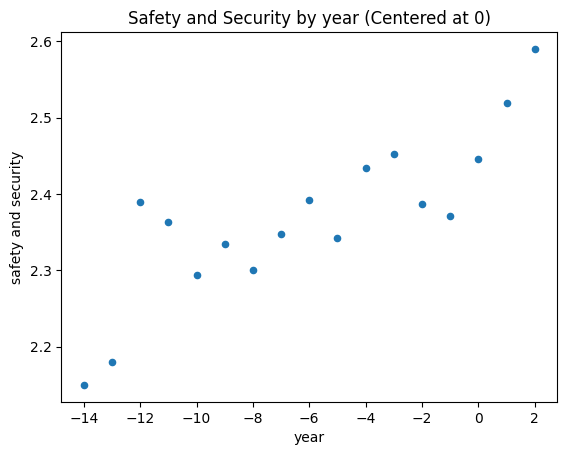

In [32]:
plt.figure(figsize=(8,8))
safety.plot.scatter(x="year", y="safety and security")
plt.title("Safety and Security by year (Centered at 0)")


In [33]:
import statsmodels.formula.api as smf
safety["safety"] = safety['safety and security']
rdd_df = safety.assign(threshold=(safety["year"] > 0).astype(int))
rdd_df

<ipython-input-33-382b275654b1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  safety["safety"] = safety['safety and security']


,country_code,country,year,safety and security,perceived criminality in society,displaced people,political instability,political terror,terrorist activity,homicides,violent crime,violent demonstrations,jailed population,security officers and police,overall,ranking (out of 163),access to weapons,organised conflict (internal),weapons imports,deaths from conflict (internal),military expenditure,armed services personnel,un peacekeeping funding,nuclear and heavy weapons,weapons exports,neighbouring country relations,deaths from conflict (external),external conflicts fought,internal conflicts fought,domestic and international conflict,militarisation,safety,threshold
0,1,Costa Rica,2,2.590,3.55,1.001,1.125,1.0,1.0,4.282,3.5,2.25,3.717,2.374,1.95,58.0,4.0,1.0,1.021,1.0,1.277,1.0,2.334,1.002,1.0,2.0,1.0,1.0,1.0,1.252,1.722,2.590,1
6,1,Costa Rica,1,2.519,3.60,1.002,1.375,1.0,1.0,4.141,3.0,2.00,3.717,2.374,1.89,53.0,4.0,1.0,1.021,1.0,1.292,1.0,1.343,1.002,1.0,2.0,1.0,1.0,1.0,1.252,1.607,2.519,1
12,1,Costa Rica,0,2.446,3.25,1.002,1.500,1.0,1.0,4.113,2.5,2.00,3.717,2.974,1.86,46.0,4.0,1.0,1.021,1.0,1.320,1.0,1.514,1.002,1.0,2.0,1.0,1.0,1.0,1.252,1.630,2.446,0
18,1,Costa Rica,-1,2.371,3.50,1.001,1.000,1.0,1.0,4.107,2.0,1.75,4.127,2.374,1.84,43.0,4.0,1.0,1.022,1.0,1.349,1.0,1.853,1.002,1.0,2.0,1.0,1.0,1.0,1.252,1.674,2.371,0
24,1,Costa Rica,-2,2.387,3.55,1.001,1.000,1.0,1.0,4.161,2.0,1.75,4.127,2.374,1.82,43.0,4.0,1.0,1.022,1.0,1.325,1.0,1.209,1.002,1.0,2.0,1.0,1.0,1.0,1.252,1.595,2.387,0
30,1,Costa Rica,-3,2.452,3.75,1.001,1.000,1.0,1.0,4.207,2.0,2.25,4.127,2.374,1.87,54.0,4.0,1.0,1.000,1.0,1.344,1.0,1.759,1.001,1.0,2.0,1.0,1.0,1.0,1.252,1.659,2.452,0
36,1,Costa Rica,-4,2.434,3.55,1.001,1.000,2.0,1.0,4.169,2.0,1.00,4.127,2.374,1.88,50.0,4.0,1.0,1.000,1.0,1.306,1.0,2.215,1.001,1.0,2.0,1.0,1.0,1.0,1.252,1.708,2.434,0
42,1,Costa Rica,-5,2.343,3.55,1.001,1.000,1.0,1.0,4.138,2.0,1.50,3.890,2.374,1.84,44.0,4.0,1.0,1.000,1.0,1.330,1.0,2.136,1.001,1.0,2.0,1.0,1.0,1.0,1.252,1.702,2.343,0
48,1,Costa Rica,-6,2.392,3.55,1.003,1.000,2.0,1.0,3.962,2.0,1.25,3.890,2.379,1.82,43.0,4.0,1.0,1.000,1.0,1.378,1.0,1.035,1.001,1.0,2.0,1.0,1.0,1.0,1.252,1.578,2.392,0
54,1,Costa Rica,-7,2.348,3.80,1.003,1.000,2.0,1.0,3.644,2.0,1.25,3.929,2.379,1.80,42.0,4.0,1.0,1.000,1.0,1.387,1.0,1.058,1.001,1.0,2.0,1.0,1.0,1.0,1.252,1.582,2.348,0


In [34]:
model = smf.wls("safety~year*threshold", rdd_df).fit()
model.summary().tables[1]

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.4479,0.030,82.960,0.000,2.384,2.512
year,0.0146,0.004,4.068,0.001,0.007,0.022
threshold,0.0001,0.137,0.001,0.999,-0.297,0.297
year:threshold,0.0564,0.085,0.664,0.518,-0.127,0.240


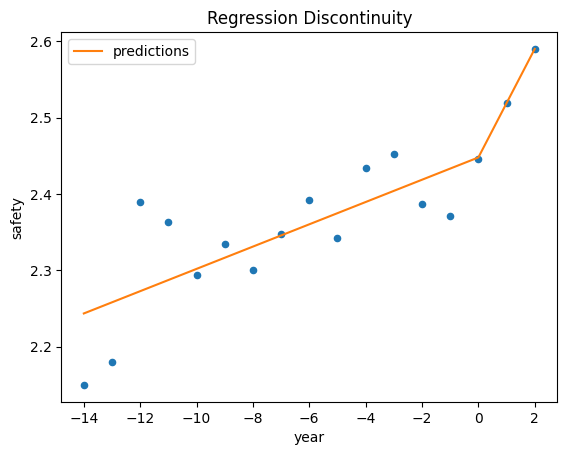

In [35]:
ax = safety.plot.scatter(x="year", y="safety", color="C0")
safety.assign(predictions=model.fittedvalues).plot(x="year", y="predictions", ax=ax, color="C1")
plt.title("Regression Discontinuity");

In [37]:
plt.figure(figsize=(8,8))
m = smf.wls("safety~year*threshold", rdd_df).fit()
ate_pct = 100*((m.params["threshold"] + m.params["Intercept"])/m.params["Intercept"] - 1)

<Figure size 800x800 with 0 Axes>

# Synthetic controls (continued in R)


In [ ]:
data_scaled = df.copy()
data_scaled.head()

In [ ]:
data_scaled.to_csv('data_scaled.csv', index=False)